# 一、语义挖掘

In [ ]:
! pip install -U textblob
! python -m textblob.download_corpora

In [60]:
from textblob import TextBlob
import pandas as pd

fake_text = pd.read_csv('DataSet_Misinfo_FAKE.csv').head(5000)
real_text = pd.read_csv('DataSet_Misinfo_TRUE.csv').head(5000)

fake_text.drop(fake_text.columns[0],axis=1,inplace=True)
real_text.drop(real_text.columns[0],axis=1,inplace=True)

fake_list = fake_text['text'].tolist()
real_list = real_text['text'].tolist()

for text in real_list:
    i = real_list.index(text)
    text = str(text)
    if  len(text) <= 100:
        real_list.pop(i)


In [61]:
def getsentiment(list):
    
    textpolarity = []
    textsubjectivity = []
    
    for text in list:
        text = str(text)
        textpolarity.append(TextBlob(text).sentiment.polarity)
        textsubjectivity.append(TextBlob(text).sentiment.subjectivity)

    
    return [textpolarity,textsubjectivity]

In [62]:
faketext_sentiment = pd.DataFrame({'group': np.repeat('fake',len(fake_list)),
                                   'polarity': getsentiment(fake_list)[0],
                                   'subjectivity':getsentiment(fake_list)[1]})

realtext_sentiment = pd.DataFrame({'group': np.repeat('real',len(real_list)),
                                   'polarity': getsentiment(real_list)[0],
                                   'subjectivity':getsentiment(real_list)[1]})

mixed_sentiment = pd.concat([faketext_sentiment,realtext_sentiment])
mixed_sentiment.reset_index(drop=True, inplace=True)
mixed_sentiment

,group,polarity,subjectivity
0,fake,0.082132,0.599895
1,fake,-0.005004,0.334098
2,fake,-0.012345,0.541969
3,fake,-0.023118,0.394086
4,fake,-0.011722,0.495222
...,...,...,...
9963,real,-0.058333,0.550000
9964,real,0.039035,0.400439
9965,real,0.196521,0.418855
9966,real,0.066682,0.370773


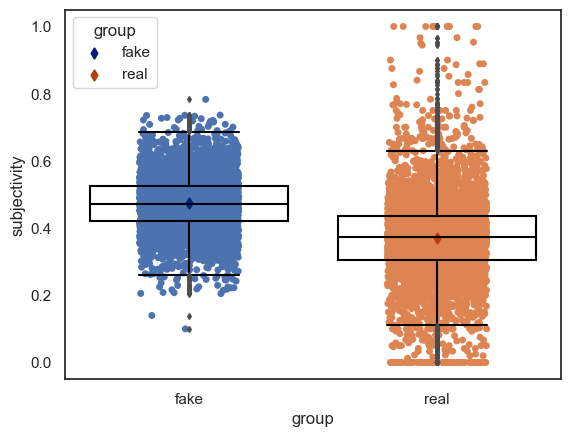

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

ax = plt.subplots()

ax = sns.stripplot(data=mixed_sentiment, x="group", y="subjectivity", hue="group",
                   alpha=1, zorder=0.9, legend=False, jitter=0.2)

ax = sns.pointplot(data=mixed_sentiment, x="group", y="subjectivity", hue="group",
                   join=False,  palette="dark", estimator='mean',
                   markers="d", scale=.75, errorbar=None)

ax = sns.boxplot(x='group', y='subjectivity', data=mixed_sentiment, 
                 boxprops = {'color':'black','facecolor':'none'},
                 capprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 medianprops = {'color':'black'},
                 fliersize=3)
sns.legend = None

plt.show()

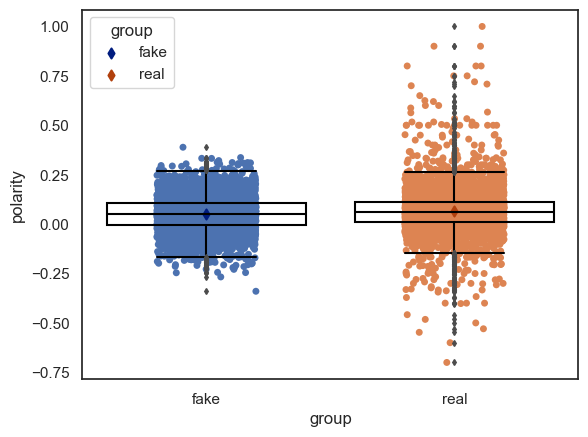

In [91]:
sns.set_theme(style="white")

ax = plt.subplots()

ax = sns.stripplot(data=mixed_sentiment, x="group", y="polarity", hue="group",
                   alpha=1, zorder=0.9, legend=False, jitter=0.2)

ax = sns.pointplot(data=mixed_sentiment, x="group", y="polarity", hue="group",
                   join=False,  palette="dark", estimator='mean',
                   markers="d", scale=.75, errorbar=None)

ax = sns.boxplot(x='group', y='polarity', data=mixed_sentiment, 
                 boxprops = {'color':'black','facecolor':'none'},
                 capprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 medianprops = {'color':'black'},
                 fliersize=3)
sns.legend = None

plt.show()

In [93]:
np.mean(faketext_sentiment['polarity'])

0.05122184480199404

In [94]:
np.mean(realtext_sentiment['polarity'])

0.06454914742547216

In [95]:
np.mean(faketext_sentiment['subjectivity'])

0.47312304621354023

In [96]:
np.mean(realtext_sentiment['subjectivity'])

0.3699721148268975